In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
#4-1
from sklearn.linear_model import Perceptron

# 훈련 집합 구축
X=[[0,0],[0,1],[1,0],[1,1]]
y=[-1,1,1,1]

# fit 함수로 Perceptron 학습
p=Perceptron()
p.fit(X,y)

print("학습된 퍼셉트론의 매개변수: ",p.coef_,p.intercept_)
print("훈련집합에 대한 예측: ",p.predict(X))
print("정확률 측정: ",p.score(X,y)*100,"%")

학습된 퍼셉트론의 매개변수:  [[2. 2.]] [-1.]
훈련집합에 대한 예측:  [-1  1  1  1]
정확률 측정:  100.0 %


In [ ]:
#4-2
from sklearn import datasets
from sklearn.linear_model import Perceptron
from sklearn.model_selection import train_test_split
import numpy as np

# 데이터셋을 읽고 훈련 집합과 테스트 집합으로 분할
digit=datasets.load_digits()
x_train,x_test,y_train,y_test=train_test_split(digit.data,digit.target,train_size=0.6)

# fit 함수로 Perceptron 학습
p=Perceptron(max_iter=100,eta0=0.001,verbose=0)
p.fit(x_train,y_train) # digit 데이터로 모델링

res=p.predict(x_test) # 테스트 집합으로 예측

# 혼동 행렬
conf=np.zeros((10,10))
for i in range(len(res)):
    conf[res[i]][y_test[i]]+=1
print(conf)

# 정확률 계산
no_correct=0
for i in range(10):
    no_correct+=conf[i][i]
accuracy=no_correct/len(res)
print("테스트 집합에 대한 정확률은 ", accuracy*100, "%입니다.")

[[63.  0.  0.  0.  0.  0.  0.  0.  2.  0.]
 [ 0. 59.  0.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  1. 71.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0. 72.  0.  0.  0.  0.  4.  1.]
 [ 0.  3.  0.  0. 73.  0.  0.  0.  0.  1.]
 [ 0.  1.  0.  0.  0. 69.  1.  0.  4.  3.]
 [ 0.  5.  0.  0.  0.  0. 79.  0.  2.  0.]
 [ 0.  0.  0.  0.  0.  0.  0. 74.  0.  1.]
 [ 0.  2.  0.  0.  1.  0.  0.  0. 61.  1.]
 [ 0.  1.  0.  0.  0.  1.  0.  0.  0. 63.]]
테스트 집합에 대한 정확률은  95.13212795549374 %입니다.


In [ ]:
#4-3
from sklearn import datasets
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import train_test_split
import numpy as np

# 데이터셋을 읽고 훈련 집합과 테스트 집합으로 분할
digit=datasets.load_digits()
x_train,x_test,y_train,y_test=train_test_split(digit.data,digit.target,train_size=0.6)

# MLP 분류기 모델을 학습
mlp=MLPClassifier(hidden_layer_sizes=(100),learning_rate_init=0.001,batch_size=32,max_iter=300,solver='sgd',verbose=True)
mlp.fit(x_train,y_train)

res=mlp.predict(x_test) # 테스트 집합으로 예측

# 혼동 행렬
conf=np.zeros((10,10))
for i in range(len(res)):
    conf[res[i]][y_test[i]]+=1
print(conf)

# 정확률 계산
no_correct=0
for i in range(10):
    no_correct+=conf[i][i]
accuracy=no_correct/len(res)
print("테스트 집합에 대한 정확률은 ", accuracy*100, "%입니다.")

Iteration 1, loss = 2.05838881
Iteration 2, loss = 0.35898861
Iteration 3, loss = 0.22742520
Iteration 4, loss = 0.17539393
Iteration 5, loss = 0.13716884
Iteration 6, loss = 0.11424917
Iteration 7, loss = 0.09964244
Iteration 8, loss = 0.08510824
Iteration 9, loss = 0.07370997
Iteration 10, loss = 0.06502036
Iteration 11, loss = 0.06194391
Iteration 12, loss = 0.05546886
Iteration 13, loss = 0.04939425
Iteration 14, loss = 0.04660856
Iteration 15, loss = 0.04239770
Iteration 16, loss = 0.03899698
Iteration 17, loss = 0.03719840
Iteration 18, loss = 0.03303664
Iteration 19, loss = 0.03119552
Iteration 20, loss = 0.02974442
Iteration 21, loss = 0.02839083
Iteration 22, loss = 0.02890973
Iteration 23, loss = 0.02553141
Iteration 24, loss = 0.02512106
Iteration 25, loss = 0.02392650
Iteration 26, loss = 0.02246360
Iteration 27, loss = 0.02108463
Iteration 28, loss = 0.02049142
Iteration 29, loss = 0.01939774
Iteration 30, loss = 0.01906142
Iteration 31, loss = 0.01895529
Iteration 32, los

In [ ]:
#4-4
from sklearn.datasets import fetch_openml
from sklearn.neural_network import MLPClassifier
import matplotlib.pyplot as plt
import numpy as np

# MNIST 데이터셋을 읽고 훈련 집합과 테스트 집합으로 분할
mnist=fetch_openml('mnist_784')
mnist.data=mnist.data/255.0
x_train=mnist.data[:60000]; x_test=mnist.data[60000:]
y_train=np.int16(mnist.target[:60000]); y_test=np.int16(mnist.target[60000:])

# MLP 분류기 모델을 학습
mlp=MLPClassifier(hidden_layer_sizes=(100),learning_rate_init=0.001,batch_size=512,max_iter=300,solver='adam',verbose=True)
mlp.fit(x_train,y_train)

# 테스트 집합으로 예측
res=mlp.predict(x_test)

# 혼동 행렬
conf=np.zeros((10,10),dtype=np.int16)
for i in range(len(res)):
    conf[res[i]][y_test[i]]+=1
print(conf)

# 정확률 계산
no_correct=0
for i in range(10):
    no_correct+=conf[i][i]
accuracy=no_correct/len(res)
print("테스트 집합에 대한 정확률은", accuracy*100, "%입니다.")

/usr/local/lib/python3.9/dist-packages/sklearn/datasets/_openml.py:968: FutureWarning: The default value of `parser` will change from `'liac-arff'` to `'auto'` in 1.4. You can set `parser='auto'` to silence this warning. Therefore, an `ImportError` will be raised from 1.4 if the dataset is dense and pandas is not installed. Note that the pandas parser may return different data types. See the Notes Section in fetch_openml's API doc for details.
  warn(


Iteration 1, loss = 0.62357294
Iteration 2, loss = 0.26744391
Iteration 3, loss = 0.21429010
Iteration 4, loss = 0.17975612
Iteration 5, loss = 0.15545992
Iteration 6, loss = 0.13660561
Iteration 7, loss = 0.12064475
Iteration 8, loss = 0.10820954
Iteration 9, loss = 0.09793418
Iteration 10, loss = 0.08935501
Iteration 11, loss = 0.08113949
Iteration 12, loss = 0.07478401
Iteration 13, loss = 0.06899554
Iteration 14, loss = 0.06373354
Iteration 15, loss = 0.05875631
Iteration 16, loss = 0.05448470
Iteration 17, loss = 0.05111801
Iteration 18, loss = 0.04746279
Iteration 19, loss = 0.04394892
Iteration 20, loss = 0.04097590
Iteration 21, loss = 0.03798548
Iteration 22, loss = 0.03565671
Iteration 23, loss = 0.03293695
Iteration 24, loss = 0.03065135
Iteration 25, loss = 0.02892635
Iteration 26, loss = 0.02699437
Iteration 27, loss = 0.02493142
Iteration 28, loss = 0.02352334
Iteration 29, loss = 0.02183137
Iteration 30, loss = 0.02069180
Iteration 31, loss = 0.01895106
Iteration 32, los

하이퍼 매개변수 최적화에 걸린 시간은 603.8007826805115 초입니다.


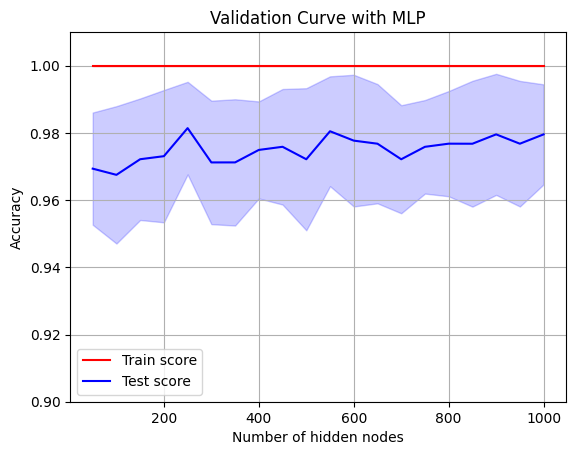


최적의 은닉층의 노드 개수는 250 개입니다.

[[79.  0.  0.  0.  0.  0.  0.  0.  0.  0.]
 [ 0. 74.  0.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  0. 77.  1.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0. 62.  0.  0.  0.  0.  1.  0.]
 [ 0.  0.  0.  0. 78.  1.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0. 59.  1.  0.  1.  1.]
 [ 0.  0.  0.  0.  0.  0. 78.  0.  0.  0.]
 [ 0.  0.  0.  0.  1.  0.  0. 69.  0.  0.]
 [ 0.  0.  0.  0.  1.  0.  0.  1. 61.  0.]
 [ 0.  0.  0.  0.  0.  2.  0.  1.  1. 69.]]
테스트 집합에 대한 정확률은 98.19193324061196 %입니다.


In [1]:
#4-5
from sklearn import datasets
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import train_test_split,validation_curve
import numpy as np
import matplotlib.pyplot as plt
import time

# 데이터셋을 읽고 훈련 집합과 테스트 집합으로 분할
digit=datasets.load_digits()
x_train,x_test,y_train,y_test=train_test_split(digit.data,digit.target,train_size=0.6)

# 다층 퍼셉트론을 교차 검증으로 성능 평가 (소요 시간 측정 포함)
start=time.time() # 시작 시각
mlp=MLPClassifier(learning_rate_init=0.001,batch_size=32,max_iter=300,solver='sgd')
prange=range(50,1001,50)
train_score,test_score=validation_curve(mlp,x_train,y_train,param_name="hidden_layer_sizes",param_range=prange,cv=10,scoring="accuracy",n_jobs=4)
end=time.time() # 끝난 시각
print("하이퍼 매개변수 최적화에 걸린 시간은",end-start,"초입니다.")

# 교차 검증 결과의 평균과 분산 구하기
train_mean = np.mean(train_score,axis=1)
train_std = np.std(train_score,axis=1)
test_mean = np.mean(test_score,axis=1)
test_std = np.std(test_score,axis=1)

# 성능 그래프 그리기
plt.plot(prange,train_mean,label="Train score",color="r")
plt.plot(prange,test_mean,label="Test score",color="b")
plt.fill_between(prange,train_mean-train_std,train_mean+train_std,alpha=0.2,color="r")
plt.fill_between(prange,test_mean-test_std,test_mean+test_std,alpha=0.2,color="b")
plt.legend(loc="best")
plt.title("Validation Curve with MLP")
plt.xlabel("Number of hidden nodes"); plt.ylabel("Accuracy")
plt.ylim(0.9,1.01)
plt.grid(axis='both')
plt.show()

best_number_nodes=prange[np.argmax(test_mean)] # 최적의 은닉 노드 개수
print("\n최적의 은닉층의 노드 개수는",best_number_nodes,"개입니다.\n")

# 최적의 은닉 노드 개수로 모델링
mlp_test=MLPClassifier(hidden_layer_sizes=(best_number_nodes),learning_rate_init=0.001,batch_size=32,max_iter=300,solver='sgd')
mlp_test.fit(x_train,y_train)

# 테스트 집합으로 예측
res=mlp_test.predict(x_test)

# 혼동 행렬
conf=np.zeros((10,10))
for i in range(len(res)):
    conf[res[i]][y_test[i]]+=1
print(conf)

# 정확률 계산
no_correct=0
for i in range(10):
    no_correct+=conf[i][i]
accuracy=no_correct/len(res)
print("테스트 집합에 대한 정확률은", accuracy*100, "%입니다.")